# Scrapping Amazon Reviews

In [1]:
#importing packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#using requests which alows us to send HTTP requests using Python
def get_soup(url):
    url = url
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [3]:
reviewlist = []
#fetching only data which is necessary like rating title and content given by the customers
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'content': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [4]:
#creating a loop from 1 to 100 reviews pages of the product
for x in range(1,100):
    soup = get_soup(f'https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break
print('Done')

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
50
Getting page: 7
60
Getting page: 8
70
Getting page: 9
70
Getting page: 10
80
Getting page: 11
90
Getting page: 12
100
Getting page: 13
110
Getting page: 14
120
Getting page: 15
130
Getting page: 16
140
Getting page: 17
140
Getting page: 18
150
Getting page: 19
150
Getting page: 20
150
Getting page: 21
150
Getting page: 22
160
Getting page: 23
170
Getting page: 24
170
Getting page: 25
180
Getting page: 26
190
Getting page: 27
200
Getting page: 28
210
Getting page: 29
220
Getting page: 30
230
Getting page: 31
240
Getting page: 32
250
Getting page: 33
260
Getting page: 34
270
Getting page: 35
280
Getting page: 36
290
Getting page: 37
300
Getting page: 38
310
Getting page: 39
320
Getting page: 40
330
Getting page: 41
340
Getting page: 42
350
Getting page: 43
360
Getting page: 44
370
Getting page: 45
380
Getting page: 46
390
Getting page: 47
400
Getting page: 48
410
Getting page

In [5]:
#creating dataframe of the list 
df = pd.DataFrame(reviewlist)
df

title  rating  \
0               I am very happy to buy this product...     5.0   
1                                     Amazingly Amazon     4.0   
2                                            base king     4.0   
3              The head phone plastic band broken out.     1.0   
4    Cheap Plastic, Average product.  Sound is dist...     2.0   
..                                                 ...     ...   
875                                               Good     4.0   
876                                         Wonderful!     5.0   
877                                          Excellent     5.0   
878  Fast delivery and jenue Products from  Amezon❤️❤️     5.0   
879  Good headphone at this price ..build material ...     3.0   

                                               content  
0                                  Nice product...👍👍..  
1    It says 8 hrs but since I use this to watch le...  
2    the base is really good. it a value for this r...  
3    This product was had manufacturing defect insi...  
4    Edit: After 1 year of usage.The headphone star...  
..                                                 ...  
875  The media could not be loaded.\n              ...  
876                         Very good quality and bass  
877                                  Excellent product  
878  Nice Sound Quality With a High Frequency of ba...  
879  Its good...nice product...but my headphone aft...  

[880 rows x 3 columns]

In [6]:
df.shape

(880, 3)

In [7]:
df['content'].unique

<bound method Series.unique of 0                                    Nice product...👍👍..
1      It says 8 hrs but since I use this to watch le...
2      the base is really good. it a value for this r...
3      This product was had manufacturing defect insi...
4      Edit: After 1 year of usage.The headphone star...
                             ...                        
875    The media could not be loaded.\n              ...
876                           Very good quality and bass
877                                    Excellent product
878    Nice Sound Quality With a High Frequency of ba...
879    Its good...nice product...but my headphone aft...
Name: content, Length: 880, dtype: object>

In [8]:
#combining two columns title and content to make a new column called reviews 
df["reviews"] = df["title"]+ '  '+df["content"]
df.head()

title  rating  \
0             I am very happy to buy this product...     5.0   
1                                   Amazingly Amazon     4.0   
2                                          base king     4.0   
3            The head phone plastic band broken out.     1.0   
4  Cheap Plastic, Average product.  Sound is dist...     2.0   

                                             content  \
0                                Nice product...👍👍..   
1  It says 8 hrs but since I use this to watch le...   
2  the base is really good. it a value for this r...   
3  This product was had manufacturing defect insi...   
4  Edit: After 1 year of usage.The headphone star...   

                                             reviews  
0  I am very happy to buy this product...  Nice p...  
1  Amazingly Amazon  It says 8 hrs but since I us...  
2  base king  the base is really good. it a value...  
3  The head phone plastic band broken out.  This ...  
4  Cheap Plastic, Average product.  Sound is dist...

In [9]:
#instead of droping the columns we can access the columns we need in further process by iloc 
amazon = df.iloc[:,[1,3]]
amazon

rating                                            reviews
0       5.0  I am very happy to buy this product...  Nice p...
1       4.0  Amazingly Amazon  It says 8 hrs but since I us...
2       4.0  base king  the base is really good. it a value...
3       1.0  The head phone plastic band broken out.  This ...
4       2.0  Cheap Plastic, Average product.  Sound is dist...
..      ...                                                ...
875     4.0  Good  The media could not be loaded.\n        ...
876     5.0             Wonderful!  Very good quality and bass
877     5.0                       Excellent  Excellent product
878     5.0  Fast delivery and jenue Products from  Amezon❤...
879     3.0  Good headphone at this price ..build material ...

[880 rows x 2 columns]

In [10]:
#now we have more information in less columns 

# Data Preprocessing

Data preprocessing is the process of transforming raw data into an understandable format. 

It is also an important step in data mining as we cannot work with raw data. 

The quality of the data should be checked before applying machine learning or data mining algorithms

In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   880 non-null    float64
 1   reviews  880 non-null    object 
dtypes: float64(1), object(1)
memory usage: 13.9+ KB


In [12]:
#checking null values  
amazon.isnull().sum()

rating     0
reviews    0
dtype: int64

In [13]:
amazon.describe()

rating
count  880.000000
mean     3.351136
std      1.555386
min      1.000000
25%      2.000000
50%      4.000000
75%      5.000000
max      5.000000

In [14]:
#counts of every rating 
amazon['rating'].value_counts()

5.0    297
1.0    197
4.0    184
3.0    127
2.0     75
Name: rating, dtype: int64

# Visualizations for Ratings

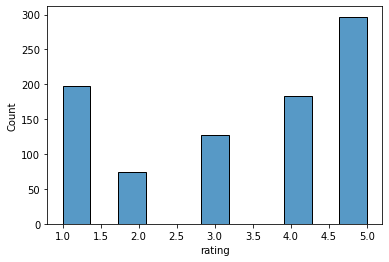

In [15]:
sns.histplot(amazon['rating'])
plt.show()

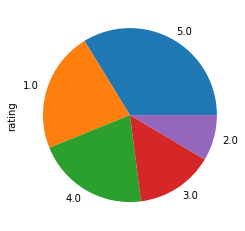

In [16]:
amazon.rating.value_counts().plot(kind='pie')
plt.show()

# Text Preprocessing

In [17]:
#to analyze the data we are a replicating the dataframe as amazon to store more columns but it won't distrub the main dataset
amazon_analysis = amazon.copy()

In [18]:
#Number of characters in single tweet
amazon_analysis['char_count'] = amazon_analysis['reviews'].str.len() ## this also includes spaces
amazon_analysis[['reviews','char_count']]

reviews  char_count
0    I am very happy to buy this product...  Nice p...          59
1    Amazingly Amazon  It says 8 hrs but since I us...         239
2    base king  the base is really good. it a value...         126
3    The head phone plastic band broken out.  This ...         527
4    Cheap Plastic, Average product.  Sound is dist...        2218
..                                                 ...         ...
875  Good  The media could not be loaded.\n        ...         146
876             Wonderful!  Very good quality and bass          38
877                       Excellent  Excellent product          28
878  Fast delivery and jenue Products from  Amezon❤...         212
879  Good headphone at this price ..build material ...         196

[880 rows x 2 columns]

In [19]:
#count of special charaters in the text  
amazon_analysis['punctuations'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('[!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]')]))
amazon_analysis[['reviews','punctuations']]

reviews  punctuations
0    I am very happy to buy this product...  Nice p...             0
1    Amazingly Amazon  It says 8 hrs but since I us...             0
2    base king  the base is really good. it a value...             0
3    The head phone plastic band broken out.  This ...             0
4    Cheap Plastic, Average product.  Sound is dist...             0
..                                                 ...           ...
875  Good  The media could not be loaded.\n        ...             0
876             Wonderful!  Very good quality and bass             0
877                       Excellent  Excellent product             0
878  Fast delivery and jenue Products from  Amezon❤...             0
879  Good headphone at this price ..build material ...             0

[880 rows x 2 columns]

In [20]:
#number of numericals present in each row
amazon_analysis['numerics'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
amazon_analysis[['reviews','numerics']]

reviews  numerics
0    I am very happy to buy this product...  Nice p...         0
1    Amazingly Amazon  It says 8 hrs but since I us...         2
2    base king  the base is really good. it a value...         0
3    The head phone plastic band broken out.  This ...         1
4    Cheap Plastic, Average product.  Sound is dist...         4
..                                                 ...       ...
875  Good  The media could not be loaded.\n        ...         0
876             Wonderful!  Very good quality and bass         0
877                       Excellent  Excellent product         0
878  Fast delivery and jenue Products from  Amezon❤...         0
879  Good headphone at this price ..build material ...         1

[880 rows x 2 columns]

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91960\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords

In [23]:
#number of stopwords in each tweet
stop = stopwords.words('english')

amazon_analysis['stopwords'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
amazon_analysis[['reviews','stopwords']]

reviews  stopwords
0    I am very happy to buy this product...  Nice p...          4
1    Amazingly Amazon  It says 8 hrs but since I us...         13
2    base king  the base is really good. it a value...         12
3    The head phone plastic band broken out.  This ...         33
4    Cheap Plastic, Average product.  Sound is dist...        128
..                                                 ...        ...
875  Good  The media could not be loaded.\n        ...          3
876             Wonderful!  Very good quality and bass          1
877                       Excellent  Excellent product          0
878  Fast delivery and jenue Products from  Amezon❤...          9
879  Good headphone at this price ..build material ...         12

[880 rows x 2 columns]

### Removing Stopwords

In [24]:
#removing all the stopwords in the column 
stop = stopwords.words('english')
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon['reviews']

<ipython-input-24-c4d734e2072a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0             I happy buy product... Nice product...👍👍..
1      Amazingly Amazon It says 8 hrs since I use wat...
2      base king base really good. value range money....
3      The head phone plastic band broken out. This p...
4      Cheap Plastic, Average product. Sound distorte...
                             ...                        
875    Good The media could loaded. Kam Achcha kar ra...
876                    Wonderful! Very good quality bass
877                          Excellent Excellent product
878    Fast delivery jenue Products Amezon❤️❤️ Nice S...
879    Good headphone price ..build material good eno...
Name: reviews, Length: 880, dtype: object

In [25]:
amazon['reviews'].isnull().sum()

0

In [26]:
#converting all the upper case and sentence case in lower case 
amazon = amazon.apply(lambda x: x.astype(str).str.lower())

In [27]:
#converted in lower case
amazon.head()

rating                                            reviews
0    5.0         i happy buy product... nice product...👍👍..
1    4.0  amazingly amazon it says 8 hrs since i use wat...
2    4.0  base king base really good. value range money....
3    1.0  the head phone plastic band broken out. this p...
4    2.0  cheap plastic, average product. sound distorte...

In [28]:
#rare words counts
freq = pd.Series(' '.join(amazon['reviews']).split()).value_counts()[-10:]
freq

anything.     1
reconnect     1
class....,    1
binging       1
24            1
best💯         1
gaming.i      1
isme          1
sec           1
quality.4.    1
dtype: int64

In [29]:
#rare words removal
freq = list(freq.index)
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
amazon['reviews'].head()

0           i happy buy product... nice product...👍👍..
1    amazingly amazon it says 8 hrs since i use wat...
2    base king base really good. value range money....
3    the head phone plastic band broken out. this p...
4    cheap plastic, average product. sound distorte...
Name: reviews, dtype: object

In [30]:
amazon

rating                                            reviews
0      5.0         i happy buy product... nice product...👍👍..
1      4.0  amazingly amazon it says 8 hrs since i use wat...
2      4.0  base king base really good. value range money....
3      1.0  the head phone plastic band broken out. this p...
4      2.0  cheap plastic, average product. sound distorte...
..     ...                                                ...
875    4.0  good the media could loaded. kam achcha kar ra...
876    5.0                  wonderful! very good quality bass
877    5.0                        excellent excellent product
878    5.0  fast delivery jenue products amezon❤️❤️ nice s...
879    3.0  good headphone price ..build material good eno...

[880 rows x 2 columns]

In [31]:
amazon['reviews'].isnull().sum()

0

In [32]:
import re

In [33]:
#removing all the emojis present in the text 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
amazon['reviews'] = amazon['reviews'].apply(lambda x: remove_emoji(x))


In [34]:
amazon['reviews'] 

0               i happy buy product... nice product.....
1      amazingly amazon it says 8 hrs since i use wat...
2      base king base really good. value range money....
3      the head phone plastic band broken out. this p...
4      cheap plastic, average product. sound distorte...
                             ...                        
875    good the media could loaded. kam achcha kar ra...
876                    wonderful! very good quality bass
877                          excellent excellent product
878    fast delivery jenue products amezon nice sound...
879    good headphone price ..build material good eno...
Name: reviews, Length: 880, dtype: object

In [35]:
# from textblob import TextBlob

In [36]:
# #spelling corrections 
# amazon['reviews'] = amazon['reviews'][:5].apply(lambda x: str(TextBlob(x).correct()))
# amazon['reviews'] 

In [37]:
amazon['reviews'].isnull().sum()

0

### Stemming 

In [38]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
amazon['reviews'] [:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0             i happi buy product... nice product.....
1    amazingli amazon it say 8 hr sinc i use watch ...
2    base king base realli good. valu rang money.i ...
3    the head phone plastic band broken out. thi pr...
4    cheap plastic, averag product. sound distort h...
Name: reviews, dtype: object

In [39]:
from textblob import Word
from textblob import TextBlob

### Lemmatization

In [40]:
amazon['reviews']  = amazon['reviews'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
amazon['reviews'] .head()

0             i happy buy product... nice product.....
1    amazingly amazon it say 8 hr since i use watch...
2    base king base really good. value range money....
3    the head phone plastic band broken out. this p...
4    cheap plastic, average product. sound distorte...
Name: reviews, dtype: object

### N_gram

In [41]:
#bigrams
TextBlob(amazon['reviews'] [0]).ngrams(2)

[WordList(['i', 'happy']),
 WordList(['happy', 'buy']),
 WordList(['buy', 'product']),
 WordList(['product', 'nice']),
 WordList(['nice', 'product'])]

In [42]:
#trigrams
TextBlob(amazon['reviews'] [0]).ngrams(3)

[WordList(['i', 'happy', 'buy']),
 WordList(['happy', 'buy', 'product']),
 WordList(['buy', 'product', 'nice']),
 WordList(['product', 'nice', 'product'])]

# CountVectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(amazon['reviews'])
print(cv.get_feature_names())

['0v', '10', '100', '1000', '1000000', '1000first', '1000rsthere', '1000then', '100rs', '1079rupees', '1099', '10bass', '10bluetooth', '10build', '10durability', '10hrs', '10m', '10mic', '10overall', '10sec', '10sound', '10total', '1100', '1100rs', '1129', '1199', '12', '1200', '1200rs', '1200rupees', '1299', '13992', '14', '14th', '15', '1500', '15days', '15hrs', '15th', '18', '18th', '19', '19th', '1hr', '1k', '1month', '1or', '1st', '1year', '20', '200', '2020', '2021', '2021didn', '21', '22', '22nd', '23', '24th', '25', '26th', '27', '27th', '29', '2hr', '2hrs', '2hrs2', '2k', '2nd', '30', '300', '3000', '30hr', '30rs', '310', '320', '350', '370', '370r', '38', '3daysi', '3hrs', '3rd', '40', '400', '40mm', '450', '450note', '45min', '46', '4nov', '4th', '50', '500', '50if', '510', '5bass', '5bass4', '5battery', '5comfort', '5connectivity', '5ears', '5k', '5material', '5mic', '5mm', '5noise', '5overall', '5recommended', '5sound', '5thank', '5to6', '60', '600', '60mts', '67', '6days'

In [45]:
cv = CountVectorizer()

reviewcv = cv.fit_transform(amazon['reviews'] )
sum_words = reviewcv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['words', 'count']


pd.options.display.max_rows=None
wf_df

words  count
0                               good    729
1                            product    660
2                            quality    620
3                              sound    487
4                                 it    359
5                          headphone    306
6                                the    260
7                               bass    197
8                                ear    181
9                                buy    169
10                               use    169
11                               one    169
12                         bluetooth    153
13                              also    145
14                           battery    136
15                             price    135
16                              boat    133
17                             money    124
18                               not    123
19                              nice    114
20                             month    113
21                              time    111
22                              best    106
23                               but     98
24                             using     97
25                             great     95
26                           working     95
27                               bad     94
28                              like     93
29                              this     89
30                               day     86
31                                go     84
32                      connectivity     84
33                              very     81
34                             noise     80
35                              poor     76
36                      cancellation     76
37                               get     74
38                              used     74
39                              long     74
40                            broken     72
41                             worst     70
42                           awesome     70
43                            really     69
44                              even     69
45                            better     68
46                             build     67
47                       comfortable     66
48                             worth     65
49                              life     64
50                             range     64
51                             could     64
52                             music     63
53                           plastic     61
54                               aux     60
55                             cable     59
56                             broke     59
57                             thing     58
58                           amazing     58
59                               low     57
60                               got     57
61                           problem     55
62                            return     55
63                           overall     54
64                              head     53
65                              hour     53
66                            volume     52
67                             value     51
68                             cheap     51
69                           headset     51
70                            amazon     50
71                                ok     50
72                               mic     50
73                            bought     50
74                               can     49
75                              pain     49
76                         excellent     49
77                             phone     48
78                               and     48
79                              wear     48
80                             start     47
81                            within     47
82                              work     47
83                              much     45
84                               you     44
85                            backup     44
86                               don     44
87                            medium     44
88                           average     42
89                              look     42
90                         

### CountVectorizer with Bi-gram & Tri-gram

Bi-gram

In [46]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [47]:
top2_words = get_top_n2_words(amazon['reviews'], n=5000) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

Bi-gram  Freq
0              sound quality   253
1               good product    83
2               quality good    77
3                 good sound    61
4         noise cancellation    61
5     bluetooth connectivity    57
6              build quality    54
7               battery life    53
8                value money    45
9               product good    42
10            battery backup    40
11              nice product    38
12                 aux cable    38
13                the medium    38
14              medium could    38
15              could loaded    38
16                 the sound    35
17               the product    35
18              good quality    33
19                 also good    32
20               price range    32
21                   it good    31
22                sound good    29
23              bass quality    29
24               buy product    28
25                   don buy    26
26                  good but    26
27           quality product    26
28             worst product    26
29                 long time    25
30               waste money    25
31              poor quality    23
32                good price    23
33                 very good    23
34            best headphone    22
35                 bass good    21
36              quality poor    21
37             quality sound    20
38            headphone good    20
39               really good    19
40              this product    19
41              good battery    19
42                  not good    19
43              quality bass    19
44                 good good    18
45              within month    18
46             cheap plastic    17
47             product sound    17
48             built quality    17
49               quality bad    17
50                  ear pain    17
51                 ear start    16
52               bad quality    16
53                product it    16
54                head phone    15
55         quality headphone    15
56              boat rockerz    15
57           stopped working    15
58                     go it    15
59               product the    14
60                  one side    14
61             great product    14
62                 good bass    13
63             cheap quality    13
64              online class    13
65                  very bad    13
66                sound bass    13
67               worth money    13
68           not comfortable    13
69           awesome product    13
70           listening music    12
71            good headphone    12
72                    buy it    12
73                 one month    12
74              boat product    12
75                 very nice    12
76               rockerz 370    12
77                 not worth    12
78              product boat    12
79             audio quality    12
80             product price    12
81               not working    12
82          quality material    12
83              quality nice    12
84              product nice    11
85             customer care    11
86              quality also    11
87                  good the    11
88            boat headphone    11
89                  it sound    11
90                  must buy    11
91                 month use    11
92         excellent product    11
93              overall good    11
94                   ear cup    10
95           quality average    10
96                    it the    10
97                 feel like    10
98              boat company    10
99                  good one    10
100              worth price    10
101                 pain ear    10
102                 can wear    10
103          amazing product    10
104              low quality    10
105          everything good    10
106             broke within    10
107                 the best    10
108                head band     9
109            broken within     9
110                 it broke     9
111                bass also     9
112               nice sound     9
113          headphone price   

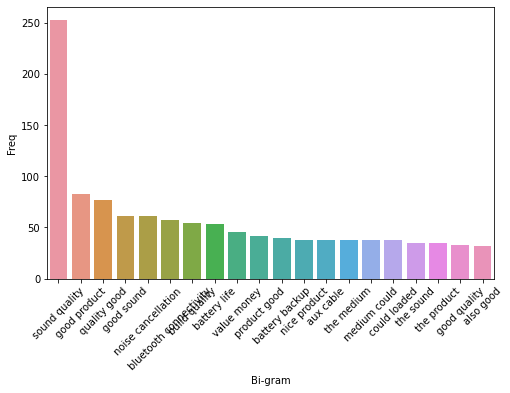

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 5)) #figure size of the visualization
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

Tri-gram

In [49]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [50]:
top3_words = get_top_n3_words(amazon['reviews'] , n=5000)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

top3_df

Tri-gram  Freq
0                    sound quality good    52
1                      the medium could    38
2                   medium could loaded    38
3                    good sound quality    31
4                     the sound quality    23
5                 product sound quality    13
6                    sound quality bass    11
7                     good battery life     9
8                      boat rockerz 370     9
9        quality bluetooth connectivity     9
10                   sound quality also     7
11                   build quality poor     7
12              good noise cancellation     7
13                     it sound quality     7
14                    very good product     7
15                   worst product ever     7
16                    bass quality good     7
17                   nice sound quality     7
18                   product good sound     7
19                     the product good     7
20              sound quality bluetooth     7
21                  good battery backup     6
22                    ear start paining     6
23                headphone price range     6
24                    build quality bad     6
25                     sound quality is     6
26                   sound bass quality     6
27                  sound quality sound     6
28                   sound quality poor     6
29          bluetooth connectivity good     6
30                  product price range     6
31                     quality good but     6
32                    very good quality     6
33                sound quality awesome     6
34              headphone sound quality     6
35                  great sound quality     6
36                sound quality amazing     6
37                   broke within month     6
38                 poor quality product     6
39                    battery life good     6
40                   product the medium     6
41                          the ear cup     5
42                   build quality good     5
43                     boat rockerz 450     5
44              bass noise cancellation     5
45                        use long time     5
46                    bad build quality     5
47                    the build quality     5
48                quality sound quality     5
49                  battery backup good     5
50                  product value money     5
51                   like sound quality     5
52                  battery backup also     5
53                    sound quality bad     5
54                amazing sound quality     5
55                quality material used     5
56               good quality headphone     5
57           quality noise cancellation     5
58                 overall good product     5
59                  build quality cheap     5
60                   sound quality nice     5
61                        can wear long     5
62                      product it good     5
63              noise cancellation also     5
64                  best headphone ever     5
65                 product good product     5
66              sound quality excellent     5
67                     good value money     5
68                      it good product     5
69                   battery life sound     4
70                   life sound quality     4
71                customer care service     4
72                   poor built quality     4
73                      using aux cable     4
74                    value money sound     4
75                awesome sound quality     4
76                 headphone the medium     4
77                  bought online class     4
78                       bass also good     4
79                    battery life also     4
80                average sound quality     4
81                   quality poor sound     4
82                      don buy product     4
83           product noise cancellation     4
84                 return window closed     4
85              noise cancellation good     4
86                   quality 

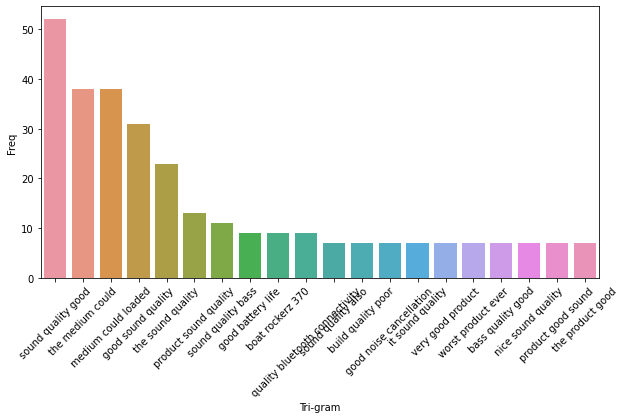

In [51]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

# Named Entity Recognition (NER)

In [52]:
import string 
import re #regular expression
import spacy

In [53]:
nlp = spacy.load("en_core_web_sm")

one_block = str(amazon['reviews'])
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [54]:
#nouns and verbs in the text
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['buy', 'product', 'product', 'amazon', 'say', 'hr', 'use', 'watch', 'base', 'king', 'base', 'value', 'head', 'phone', 'plastic', 'band', 'broken', 'p', 'plastic', 'product', 'distorte', 'value', 'money', 'sound', 'crystal', 'clearbass', 'buy', 'bass', 'quality', 'used', 'month', 'headphone', 'month', 'review', 'performanceif', 'broken', 'month', 'fan', 'boat', 'product', 'recieved', 'used', 'product', 'br', 'go', 'boat', 'product', 'month', 'value', 'money', 'product', 'products', 'buy', 'product', 'using', 'h', 'worry', 'writing', 'review', 'mo', 'boat', 'rocker', 'headphone', 'medium', 'loaded', 'headphones', 'headphones', 'broke', 'month', 'return', 'warranty', 'period', 'pro', 'price', 'product', 'voice', 'cancellation', 'ear', 'head', 'stared', 'paining', 'con', 'like', 'start', 'sound', 'batt', 'reading', 'review', 'people', 'l', 'mind', 'blowing', 'product', 'wish', 'give', 'star', 'pr', 'problem', 'headphone', 'term', 'quality', 'build', 'quality', 'ergonomics', 'bought', 'mon

In [55]:

len(nouns_verbs)

3134

In [56]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#with collected nouns and verbs
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','count']
wd_df

words  count
0            product    326
1            quality    240
2              sound    128
3          headphone    109
4                buy     61
5              price     60
6              money     56
7               bass     40
8              month     38
9            battery     35
10             value     34
11               ear     34
12               use     33
13              boat     33
14         bluetooth     31
15                go     28
16           working     27
17             using     26
18            medium     26
19              good     25
20            broken     24
21            loaded     23
22            bought     22
23             build     20
24             range     19
25              used     18
26      connectivity     18
27             noise     17
28           plastic     16
29            review     16
30             waste     16
31             music     16
32              life     15
33           headset     15
34              like     14
35             thing     14
36              head     13
37            return     13
38          material     13
39              work     12
40              love     12
41          purchase     11
42            budget     11
43               day     11
44          expected     11
45      cancellation     10
46            design     10
47               get     10
48              time     10
49               got     10
50             phone      9
51             broke      9
52             voice      9
53           problem      9
54              week      9
55             issue      9
56             liked      9
57              side      9
58            superb      9
59           comfort      9
60              look      8
61             built      8
62        experience      8
63              wear      8
64       performance      8
65        headphones      7
66               goo      7
67             class      7
68           cushion      7
69          received      7
70              want      7
71              need      7
72            backup      7
73        microphone      7
74              item      7
75             loved      7
76            qualit      7
77           looking      7
78            amazon      6
79              star      6
80              pain      6
81             piece      6
82           rockerz      6
83           ordered      6
84           service      6
85          charging      6
86         purchased      6
87                ok      6
88              band      5
89           writing      5
90              come      5
91         listening      5
92            buying      5
93           damaged      5
94             usage      5
95             brand      5
96              made      5
97               min      5
98               qua      5
99              ears      5
100        packaging      5
101           rocker      4
102         warranty      4
103              pro      4
104             hear      4
105          earcups      4
106            audio      4
107            produ      4
108          dislike      4
109             size      4
110              pad      4
111          improve      4
112            cable      4
113         headphon      4
114          feature      4
115          average      4
116        reviewing      4
117            break      4
118          connect      4
119           device      4
120          stopped      4
121             feel      4
122             help      4
123           expect      4
124             base      3
125          crystal      3
126         recieved      3
127               mo      3
128          paining      3
129            start      3
130             mind      3
131          blowing      3
132             term      3
133          started      3
134             read      3
135             keep      3
136            going      3
137            point      3
138            given      3
139             sale      3
140          support      3
141         compared      3
142        

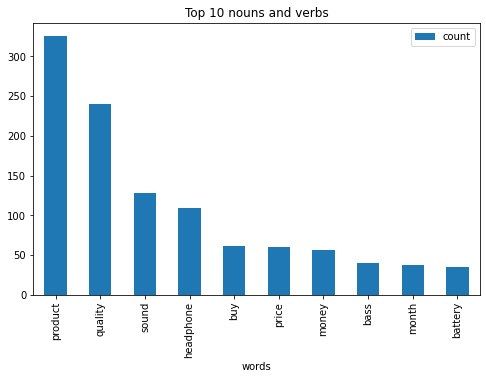

In [57]:
# Visualizing results (Barchart for top 10[nouns + verbs])

wd_df[0:10].plot.bar(x='words',figsize=(8,5),title='Top 10 nouns and verbs');
plt.show()

# Word Cloud

In [58]:
from PIL import Image

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('words')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
mask = np.array(Image.open("D:\\DATA SCIENCE\\Project\\Sentiment Analysis on Amazon Product Reviews\\amazon-icon-6.png"))
wordcloud = WordCloud(width=10000,height=5000,background_color='white',max_words=500,
                   colormap='Set1', mask=mask, stopwords=STOPWORDS).generate(str(wd_df))
plt.savefig("amazon.png", format="png")
plot_cloud(wordcloud)
plt.show()

## Sentiment Analysis for each word

In [59]:
#sentiment
wd_df['words'][:5].apply(lambda x: TextBlob(x).sentiment)
wd_df['sentiment'] = wd_df['words'].apply(lambda x: TextBlob(x).sentiment[0] )
wd_df[['words','sentiment']]

words  sentiment
0            product   0.000000
1            quality   0.000000
2              sound   0.400000
3          headphone   0.000000
4                buy   0.000000
5              price   0.000000
6              money   0.000000
7               bass  -0.150000
8              month   0.000000
9            battery   0.000000
10             value   0.000000
11               ear   0.000000
12               use   0.000000
13              boat   0.000000
14         bluetooth   0.000000
15                go   0.000000
16           working   0.000000
17             using   0.000000
18            medium   0.000000
19              good   0.700000
20            broken  -0.400000
21            loaded   0.000000
22            bought   0.000000
23             build   0.000000
24             range   0.000000
25              used   0.000000
26      connectivity   0.000000
27             noise   0.000000
28           plastic   0.000000
29            review   0.000000
30             waste  -0.200000
31             music   0.000000
32              life   0.000000
33           headset   0.000000
34              like   0.000000
35             thing   0.000000
36              head   0.000000
37            return   0.000000
38          material   0.000000
39              work   0.000000
40              love   0.500000
41          purchase   0.000000
42            budget   0.000000
43               day   0.000000
44          expected  -0.100000
45      cancellation   0.000000
46            design   0.000000
47               get   0.000000
48              time   0.000000
49               got   0.000000
50             phone   0.000000
51             broke   0.000000
52             voice   0.000000
53           problem   0.000000
54              week   0.000000
55             issue   0.000000
56             liked   0.600000
57              side   0.000000
58            superb   1.000000
59           comfort   0.000000
60              look   0.000000
61             built   0.000000
62        experience   0.000000
63              wear   0.000000
64       performance   0.000000
65        headphones   0.000000
66               goo   0.000000
67             class   0.000000
68           cushion   0.000000
69          received   0.000000
70              want   0.000000
71              need   0.000000
72            backup   0.000000
73        microphone   0.000000
74              item   0.000000
75             loved   0.700000
76            qualit   0.000000
77           looking   0.000000
78            amazon   0.000000
79              star   0.000000
80              pain   0.000000
81             piece   0.000000
82           rockerz   0.000000
83           ordered   0.000000
84           service   0.000000
85          charging   0.000000
86         purchased   0.000000
87                ok   0.500000
88              band   0.000000
89           writing   0.000000
90              come   0.000000
91         listening   0.000000
92            buying   0.000000
93           damaged   0.000000
94             usage   0.000000
95             brand   0.000000
96              made   0.000000
97               min   0.000000
98               qua   0.000000
99              ears   0.000000
100        packaging   0.000000
101           rocker   0.000000
102         warranty   0.000000
103              pro   0.000000
104             hear   0.000000
105          earcups   0.000000
106            audio   0.000000
107            produ   0.000000
108          dislike   0.000000
109             size   0.000000
110              pad   0.000000
111          improve   0.000000
112            cable   0.000000
113         headphon   0.000000
114          feature   0.000000
115          average  -0.150000
116        reviewing   0.000000
117            break   0.000000
118          connect   0.000000
119           device   0.000000
120          stopped   0.000000
121             feel   0.000000
122             help   0.000000
123           expect   0.000000
124            

In [60]:
#  subjectivity and polarity 
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

wd_df['Subjectivity'] = wd_df['words'].apply(getSubjectivity)
wd_df['Polarity'] = wd_df['words'].apply(getPolarity)


In [61]:
wd_df

words  count  sentiment  Subjectivity  Polarity
0            product    326   0.000000      0.000000  0.000000
1            quality    240   0.000000      0.000000  0.000000
2              sound    128   0.400000      0.400000  0.400000
3          headphone    109   0.000000      0.000000  0.000000
4                buy     61   0.000000      0.000000  0.000000
5              price     60   0.000000      0.000000  0.000000
6              money     56   0.000000      0.000000  0.000000
7               bass     40  -0.150000      0.500000 -0.150000
8              month     38   0.000000      0.000000  0.000000
9            battery     35   0.000000      0.000000  0.000000
10             value     34   0.000000      0.000000  0.000000
11               ear     34   0.000000      0.000000  0.000000
12               use     33   0.000000      0.000000  0.000000
13              boat     33   0.000000      0.000000  0.000000
14         bluetooth     31   0.000000      0.000000  0.000000
15                go     28   0.000000      0.000000  0.000000
16           working     27   0.000000      0.000000  0.000000
17             using     26   0.000000      0.000000  0.000000
18            medium     26   0.000000      0.000000  0.000000
19              good     25   0.700000      0.600000  0.700000
20            broken     24  -0.400000      0.400000 -0.400000
21            loaded     23   0.000000      0.000000  0.000000
22            bought     22   0.000000      0.000000  0.000000
23             build     20   0.000000      0.000000  0.000000
24             range     19   0.000000      0.000000  0.000000
25              used     18   0.000000      0.000000  0.000000
26      connectivity     18   0.000000      0.000000  0.000000
27             noise     17   0.000000      0.000000  0.000000
28           plastic     16   0.000000      0.000000  0.000000
29            review     16   0.000000      0.000000  0.000000
30             waste     16  -0.200000      0.000000 -0.200000
31             music     16   0.000000      0.000000  0.000000
32              life     15   0.000000      0.000000  0.000000
33           headset     15   0.000000      0.000000  0.000000
34              like     14   0.000000      0.000000  0.000000
35             thing     14   0.000000      0.000000  0.000000
36              head     13   0.000000      0.000000  0.000000
37            return     13   0.000000      0.000000  0.000000
38          material     13   0.000000      0.000000  0.000000
39              work     12   0.000000      0.000000  0.000000
40              love     12   0.500000      0.600000  0.500000
41          purchase     11   0.000000      0.000000  0.000000
42            budget     11   0.000000      0.000000  0.000000
43               day     11   0.000000      0.000000  0.000000
44          expected     11  -0.100000      0.400000 -0.100000
45      cancellation     10   0.000000      0.000000  0.000000
46            design     10   0.000000      0.000000  0.000000
47               get     10   0.000000      0.000000  0.000000
48              time     10   0.000000      0.000000  0.000000
49               got     10   0.000000      0.000000  0.000000
50             phone      9   0.000000      0.000000  0.000000
51             broke      9   0.000000      0.000000  0.000000
52             voice      9   0.000000      0.000000  0.000000
53           problem      9   0.000000      0.000000  0.000000
54              week      9   0.000000      0.000000  0.000000
55             issue      9   0.000000      0.000000  0.000000
56             liked      9   0.600000      0.800000  0.600000
57              side      9   0.000000      0.000000  0.000000
58            superb      9   1.000000      1.000000  1.000000
59           comfort      9   0.000000      0.000000  0.000000
60              look      8   0.000000      0.000000  0.000000
61             built      8   0.000000      0.000000  0.000000
62        experience      8   0.000000      0.

In [62]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
wd_df['Analysis'] = wd_df['Polarity'].apply(getAnalysis)

In [63]:
wd_df

words  count  sentiment  Subjectivity  Polarity  Analysis
0            product    326   0.000000      0.000000  0.000000   Neutral
1            quality    240   0.000000      0.000000  0.000000   Neutral
2              sound    128   0.400000      0.400000  0.400000  Positive
3          headphone    109   0.000000      0.000000  0.000000   Neutral
4                buy     61   0.000000      0.000000  0.000000   Neutral
5              price     60   0.000000      0.000000  0.000000   Neutral
6              money     56   0.000000      0.000000  0.000000   Neutral
7               bass     40  -0.150000      0.500000 -0.150000  Negative
8              month     38   0.000000      0.000000  0.000000   Neutral
9            battery     35   0.000000      0.000000  0.000000   Neutral
10             value     34   0.000000      0.000000  0.000000   Neutral
11               ear     34   0.000000      0.000000  0.000000   Neutral
12               use     33   0.000000      0.000000  0.000000   Neutral
13              boat     33   0.000000      0.000000  0.000000   Neutral
14         bluetooth     31   0.000000      0.000000  0.000000   Neutral
15                go     28   0.000000      0.000000  0.000000   Neutral
16           working     27   0.000000      0.000000  0.000000   Neutral
17             using     26   0.000000      0.000000  0.000000   Neutral
18            medium     26   0.000000      0.000000  0.000000   Neutral
19              good     25   0.700000      0.600000  0.700000  Positive
20            broken     24  -0.400000      0.400000 -0.400000  Negative
21            loaded     23   0.000000      0.000000  0.000000   Neutral
22            bought     22   0.000000      0.000000  0.000000   Neutral
23             build     20   0.000000      0.000000  0.000000   Neutral
24             range     19   0.000000      0.000000  0.000000   Neutral
25              used     18   0.000000      0.000000  0.000000   Neutral
26      connectivity     18   0.000000      0.000000  0.000000   Neutral
27             noise     17   0.000000      0.000000  0.000000   Neutral
28           plastic     16   0.000000      0.000000  0.000000   Neutral
29            review     16   0.000000      0.000000  0.000000   Neutral
30             waste     16  -0.200000      0.000000 -0.200000  Negative
31             music     16   0.000000      0.000000  0.000000   Neutral
32              life     15   0.000000      0.000000  0.000000   Neutral
33           headset     15   0.000000      0.000000  0.000000   Neutral
34              like     14   0.000000      0.000000  0.000000   Neutral
35             thing     14   0.000000      0.000000  0.000000   Neutral
36              head     13   0.000000      0.000000  0.000000   Neutral
37            return     13   0.000000      0.000000  0.000000   Neutral
38          material     13   0.000000      0.000000  0.000000   Neutral
39              work     12   0.000000      0.000000  0.000000   Neutral
40              love     12   0.500000      0.600000  0.500000  Positive
41          purchase     11   0.000000      0.000000  0.000000   Neutral
42            budget     11   0.000000      0.000000  0.000000   Neutral
43               day     11   0.000000      0.000000  0.000000   Neutral
44          expected     11  -0.100000      0.400000 -0.100000  Negative
45      cancellation     10   0.000000      0.000000  0.000000   Neutral
46            design     10   0.000000      0.000000  0.000000   Neutral
47               get     10   0.000000      0.000000  0.000000   Neutral
48              time     10   0.000000      0.000000  0.000000   Neutral
49               got     10   0.000000      0.000000  0.000000   Neutral
50             phone      9   0.000000      0.000000  0.000000   Neutral
51             broke      9   0.000000      0.000000  0.000000   Neutral
52             voice      9   0.000000      0.000000  0.000000   Neutral
53           problem      9   0.000000      0.000000  0.000000   Neutral


In [64]:
wd_df['Analysis'].count

<bound method Series.count of 0       Neutral
1       Neutral
2      Positive
3       Neutral
4       Neutral
5       Neutral
6       Neutral
7      Negative
8       Neutral
9       Neutral
10      Neutral
11      Neutral
12      Neutral
13      Neutral
14      Neutral
15      Neutral
16      Neutral
17      Neutral
18      Neutral
19     Positive
20     Negative
21      Neutral
22      Neutral
23      Neutral
24      Neutral
25      Neutral
26      Neutral
27      Neutral
28      Neutral
29      Neutral
30     Negative
31      Neutral
32      Neutral
33      Neutral
34      Neutral
35      Neutral
36      Neutral
37      Neutral
38      Neutral
39      Neutral
40     Positive
41      Neutral
42      Neutral
43      Neutral
44     Negative
45      Neutral
46      Neutral
47      Neutral
48      Neutral
49      Neutral
50      Neutral
51      Neutral
52      Neutral
53      Neutral
54      Neutral
55      Neutral
56     Positive
57      Neutral
58     Positive
59      Neutral
60      Ne

<AxesSubplot:>

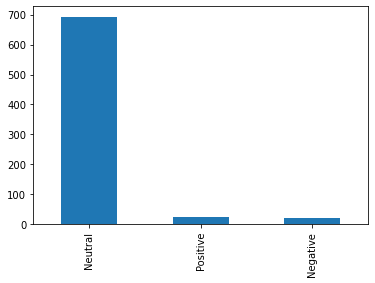

In [65]:
wd_df['Analysis'].value_counts().plot(kind='bar')

# Sentiment Analysis for each review

In [66]:
amazon['reviews'][:5].apply(lambda x: TextBlob(x).sentiment)


0                                   (0.7, 1.0)
1                            (0.25125, 0.5925)
2                   (0.07999999999999996, 0.8)
3                                  (-0.4, 0.4)
4    (0.21721428571428567, 0.5209404761904762)
Name: reviews, dtype: object

In [67]:
amazon['sentiment'] = amazon['reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
amazon[['reviews','sentiment']]

reviews     sentiment
0             i happy buy product... nice product.....  7.000000e-01
1    amazingly amazon it say 8 hr since i use watch...  2.512500e-01
2    base king base really good. value range money....  8.000000e-02
3    the head phone plastic band broken out. this p... -4.000000e-01
4    cheap plastic, average product. sound distorte...  2.172143e-01
5    value money sound crystal clearbass pretty goo...  3.250000e-01
6    don't buy please... bass disgusting... range g... -1.500000e-01
7    cheap quality i used 1 month headphone literal...  1.114583e-01
8    after 2 month review marvelous performanceif w...  4.277778e-01
9    broken within one month!!! i huge fan boat pur... -1.802083e-01
10   product great recieved used product instead br...  1.602968e-01
11   never go boat product didn't last month... it ... -7.142857e-02
12                            value money product nice  6.000000e-01
13   worst products. plz buy product.. using half h... -5.833333e-01
14   perfect! free worry well i writing review 6 mo...  3.921667e-01
15   very nice sound boat rocker 310 perhaps best s...  5.042857e-01
16   amazing (bt) headphone the medium could loaded...  2.799242e-01
17   useless headphones. poor basic headphones. hig... -3.791209e-02
18   broke 3 month won’t return warranty period pro... -1.000000e-01
19   not worth price product no voice cancellation ...  1.932692e-01
20   not good my ear head stared paining. it's unco...  2.000000e-02
21   pro con i would like start pro sound good batt...  3.500000e-01
22   it's good after reading review people really l...  2.731250e-01
23                         ok super super mind blowing  3.888889e-01
24   bad product i wish i could give 0 star this pr... -1.593750e-01
25   problem the headphone kinda good term audio qu...  5.000000e-01
26   sound quality is great, build quality poor! so...  1.885417e-01
27   poor ergonomics bought almost 4 month ago.work...  2.877976e-01
28   bluetooth connectivity sound quality doubt goo...  1.197917e-01
29   disappointed ,duplicate product don’t purchase...  2.500000e-02
30   best price(999) i bought attend online class c...  5.187500e-01
31   just okay. not great. this product okay great....  9.285714e-02
32   battery life i using earphone 4 month now, sur...  2.250000e-01
33   just above average product. for price 1100 blu...  1.722222e-01
34   uncomfortable, pain ear i using headphone last...  8.428571e-02
35   it work • good sound quality, vocal crystal cl...  2.434066e-01
36   what stupid waste money i can't believe experi... -2.208333e-01
37   noise cancellation?? my son can't hear me when...  3.979167e-01
38   not worth wa working fine 1st week. started he... -4.032738e-02
39   technical issue it's 2 month since i'm using p... -4.375000e-02
40   average headphone good mic quality hey purchas...  2.575000e-01
41   a decent product reasonable price! first all, ...  2.416667e-01
42   it cheap version high price. the product come ...  1.075758e-02
43   balanced sound longtime ache ear cause cufs ki...  2.270663e-01
44   good product price range the medium could load...  2.916667e-01
45   cheap plastic, average product. broken within ... -1.705128e-01
46   bad mic , mic is not working bought on 29 may ... -7.000000e-01
47   only bass good bass n sound quality good. but ...  1.500000e-01
48   above average... this headphone good non-bass ...  2.571429e-01
49   cristal clear sound, stylish perfect moment li...  4.867708e-01
50   good product listening music walking trouble, ...  3.700000e-01
51   buy budget super tight ! decent product1. buil...  6.367857e-02
52   bad good. first thing first. while opening pac...  1.663889e-01
53   best headphone price range this headphone best...  2.413462e-01
54   full review plz read buying headset. hi i goin...  2.762605e-01
55   everything good but... sound quality great bas...  3.916667e-01
56   a reasonable choice price. writing review usin...  3.076441e-01
57   battery champ 1k bought 999/-its good th

## Subjectivity and Polarity 

In [68]:
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

amazon['Subjectivity'] = amazon['reviews'].apply(getSubjectivity)
amazon['Polarity'] = amazon['reviews'].apply(getPolarity)


In [69]:
amazon

rating                                            reviews     sentiment  \
0      5.0           i happy buy product... nice product.....  7.000000e-01   
1      4.0  amazingly amazon it say 8 hr since i use watch...  2.512500e-01   
2      4.0  base king base really good. value range money....  8.000000e-02   
3      1.0  the head phone plastic band broken out. this p... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value money sound crystal clearbass pretty goo...  3.250000e-01   
6      1.0  don't buy please... bass disgusting... range g... -1.500000e-01   
7      1.0  cheap quality i used 1 month headphone literal...  1.114583e-01   
8      4.0  after 2 month review marvelous performanceif w...  4.277778e-01   
9      1.0  broken within one month!!! i huge fan boat pur... -1.802083e-01   
10     4.0  product great recieved used product instead br...  1.602968e-01   
11     1.0  never go boat product didn't last month... it ... -7.142857e-02   
12     4.0                           value money product nice  6.000000e-01   
13     1.0  worst products. plz buy product.. using half h... -5.833333e-01   
14     5.0  perfect! free worry well i writing review 6 mo...  3.921667e-01   
15     5.0  very nice sound boat rocker 310 perhaps best s...  5.042857e-01   
16     5.0  amazing (bt) headphone the medium could loaded...  2.799242e-01   
17     1.0  useless headphones. poor basic headphones. hig... -3.791209e-02   
18     1.0  broke 3 month won’t return warranty period pro... -1.000000e-01   
19     1.0  not worth price product no voice cancellation ...  1.932692e-01   
20     1.0  not good my ear head stared paining. it's unco...  2.000000e-02   
21     4.0  pro con i would like start pro sound good batt...  3.500000e-01   
22     5.0  it's good after reading review people really l...  2.731250e-01   
23     5.0                        ok super super mind blowing  3.888889e-01   
24     2.0  bad product i wish i could give 0 star this pr... -1.593750e-01   
25     2.0  problem the headphone kinda good term audio qu...  5.000000e-01   
26     3.0  sound quality is great, build quality poor! so...  1.885417e-01   
27     2.0  poor ergonomics bought almost 4 month ago.work...  2.877976e-01   
28     4.0  bluetooth connectivity sound quality doubt goo...  1.197917e-01   
29     1.0  disappointed ,duplicate product don’t purchase...  2.500000e-02   
30     5.0  best price(999) i bought attend online class c...  5.187500e-01   
31     1.0  just okay. not great. this product okay great....  9.285714e-02   
32     5.0  battery life i using earphone 4 month now, sur...  2.250000e-01   
33     4.0  just above average product. for price 1100 blu...  1.722222e-01   
34     3.0  uncomfortable, pain ear i using headphone last...  8.428571e-02   
35     5.0  it work • good sound quality, vocal crystal cl...  2.434066e-01   
36     1.0  what stupid waste money i can't believe experi... -2.208333e-01   
37     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
38     1.0  not worth wa working fine 1st week. started he... -4.032738e-02   
39     1.0  technical issue it's 2 month since i'm using p... -4.375000e-02   
40     4.0  average headphone good mic quality hey purchas...  2.575000e-01   
41     5.0  a decent product reasonable price! first all, ...  2.416667e-01   
42     2.0  it cheap version high price. the product come ...  1.075758e-02   
43     3.0  balanced sound longtime ache ear cause cufs ki...  2.270663e-01   
44     3.0  good product price range the medium could load...  2.916667e-01   
45     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
46     1.0  bad mic , mic is not working bought on 29 may ... -7.000000e-01   
47     3.0  only bass good bass n sound quality good. but ...  1.500000e-01   
48     4.0  above average... this headphone good non-bass ...  2.571429e-01   
49     5.0  cristal clear sound, stylish perfect momen

In [70]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
amazon['Analysis'] = amazon['Polarity'].apply(getAnalysis)

In [71]:
amazon

rating                                            reviews     sentiment  \
0      5.0           i happy buy product... nice product.....  7.000000e-01   
1      4.0  amazingly amazon it say 8 hr since i use watch...  2.512500e-01   
2      4.0  base king base really good. value range money....  8.000000e-02   
3      1.0  the head phone plastic band broken out. this p... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value money sound crystal clearbass pretty goo...  3.250000e-01   
6      1.0  don't buy please... bass disgusting... range g... -1.500000e-01   
7      1.0  cheap quality i used 1 month headphone literal...  1.114583e-01   
8      4.0  after 2 month review marvelous performanceif w...  4.277778e-01   
9      1.0  broken within one month!!! i huge fan boat pur... -1.802083e-01   
10     4.0  product great recieved used product instead br...  1.602968e-01   
11     1.0  never go boat product didn't last month... it ... -7.142857e-02   
12     4.0                           value money product nice  6.000000e-01   
13     1.0  worst products. plz buy product.. using half h... -5.833333e-01   
14     5.0  perfect! free worry well i writing review 6 mo...  3.921667e-01   
15     5.0  very nice sound boat rocker 310 perhaps best s...  5.042857e-01   
16     5.0  amazing (bt) headphone the medium could loaded...  2.799242e-01   
17     1.0  useless headphones. poor basic headphones. hig... -3.791209e-02   
18     1.0  broke 3 month won’t return warranty period pro... -1.000000e-01   
19     1.0  not worth price product no voice cancellation ...  1.932692e-01   
20     1.0  not good my ear head stared paining. it's unco...  2.000000e-02   
21     4.0  pro con i would like start pro sound good batt...  3.500000e-01   
22     5.0  it's good after reading review people really l...  2.731250e-01   
23     5.0                        ok super super mind blowing  3.888889e-01   
24     2.0  bad product i wish i could give 0 star this pr... -1.593750e-01   
25     2.0  problem the headphone kinda good term audio qu...  5.000000e-01   
26     3.0  sound quality is great, build quality poor! so...  1.885417e-01   
27     2.0  poor ergonomics bought almost 4 month ago.work...  2.877976e-01   
28     4.0  bluetooth connectivity sound quality doubt goo...  1.197917e-01   
29     1.0  disappointed ,duplicate product don’t purchase...  2.500000e-02   
30     5.0  best price(999) i bought attend online class c...  5.187500e-01   
31     1.0  just okay. not great. this product okay great....  9.285714e-02   
32     5.0  battery life i using earphone 4 month now, sur...  2.250000e-01   
33     4.0  just above average product. for price 1100 blu...  1.722222e-01   
34     3.0  uncomfortable, pain ear i using headphone last...  8.428571e-02   
35     5.0  it work • good sound quality, vocal crystal cl...  2.434066e-01   
36     1.0  what stupid waste money i can't believe experi... -2.208333e-01   
37     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
38     1.0  not worth wa working fine 1st week. started he... -4.032738e-02   
39     1.0  technical issue it's 2 month since i'm using p... -4.375000e-02   
40     4.0  average headphone good mic quality hey purchas...  2.575000e-01   
41     5.0  a decent product reasonable price! first all, ...  2.416667e-01   
42     2.0  it cheap version high price. the product come ...  1.075758e-02   
43     3.0  balanced sound longtime ache ear cause cufs ki...  2.270663e-01   
44     3.0  good product price range the medium could load...  2.916667e-01   
45     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
46     1.0  bad mic , mic is not working bought on 29 may ... -7.000000e-01   
47     3.0  only bass good bass n sound quality good. but ...  1.500000e-01   
48     4.0  above average... this headphone good non-bass ...  2.571429e-01   
49     5.0  cristal clear sound, stylish perfect momen

<AxesSubplot:>

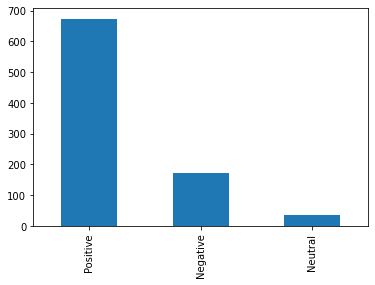

In [72]:
amazon['Analysis'].value_counts().plot(kind='bar')

In [73]:
amazon

rating                                            reviews     sentiment  \
0      5.0           i happy buy product... nice product.....  7.000000e-01   
1      4.0  amazingly amazon it say 8 hr since i use watch...  2.512500e-01   
2      4.0  base king base really good. value range money....  8.000000e-02   
3      1.0  the head phone plastic band broken out. this p... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value money sound crystal clearbass pretty goo...  3.250000e-01   
6      1.0  don't buy please... bass disgusting... range g... -1.500000e-01   
7      1.0  cheap quality i used 1 month headphone literal...  1.114583e-01   
8      4.0  after 2 month review marvelous performanceif w...  4.277778e-01   
9      1.0  broken within one month!!! i huge fan boat pur... -1.802083e-01   
10     4.0  product great recieved used product instead br...  1.602968e-01   
11     1.0  never go boat product didn't last month... it ... -7.142857e-02   
12     4.0                           value money product nice  6.000000e-01   
13     1.0  worst products. plz buy product.. using half h... -5.833333e-01   
14     5.0  perfect! free worry well i writing review 6 mo...  3.921667e-01   
15     5.0  very nice sound boat rocker 310 perhaps best s...  5.042857e-01   
16     5.0  amazing (bt) headphone the medium could loaded...  2.799242e-01   
17     1.0  useless headphones. poor basic headphones. hig... -3.791209e-02   
18     1.0  broke 3 month won’t return warranty period pro... -1.000000e-01   
19     1.0  not worth price product no voice cancellation ...  1.932692e-01   
20     1.0  not good my ear head stared paining. it's unco...  2.000000e-02   
21     4.0  pro con i would like start pro sound good batt...  3.500000e-01   
22     5.0  it's good after reading review people really l...  2.731250e-01   
23     5.0                        ok super super mind blowing  3.888889e-01   
24     2.0  bad product i wish i could give 0 star this pr... -1.593750e-01   
25     2.0  problem the headphone kinda good term audio qu...  5.000000e-01   
26     3.0  sound quality is great, build quality poor! so...  1.885417e-01   
27     2.0  poor ergonomics bought almost 4 month ago.work...  2.877976e-01   
28     4.0  bluetooth connectivity sound quality doubt goo...  1.197917e-01   
29     1.0  disappointed ,duplicate product don’t purchase...  2.500000e-02   
30     5.0  best price(999) i bought attend online class c...  5.187500e-01   
31     1.0  just okay. not great. this product okay great....  9.285714e-02   
32     5.0  battery life i using earphone 4 month now, sur...  2.250000e-01   
33     4.0  just above average product. for price 1100 blu...  1.722222e-01   
34     3.0  uncomfortable, pain ear i using headphone last...  8.428571e-02   
35     5.0  it work • good sound quality, vocal crystal cl...  2.434066e-01   
36     1.0  what stupid waste money i can't believe experi... -2.208333e-01   
37     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
38     1.0  not worth wa working fine 1st week. started he... -4.032738e-02   
39     1.0  technical issue it's 2 month since i'm using p... -4.375000e-02   
40     4.0  average headphone good mic quality hey purchas...  2.575000e-01   
41     5.0  a decent product reasonable price! first all, ...  2.416667e-01   
42     2.0  it cheap version high price. the product come ...  1.075758e-02   
43     3.0  balanced sound longtime ache ear cause cufs ki...  2.270663e-01   
44     3.0  good product price range the medium could load...  2.916667e-01   
45     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
46     1.0  bad mic , mic is not working bought on 29 may ... -7.000000e-01   
47     3.0  only bass good bass n sound quality good. but ...  1.500000e-01   
48     4.0  above average... this headphone good non-bass ...  2.571429e-01   
49     5.0  cristal clear sound, stylish perfect momen

## Generate Positive Reviews Word Cloud

In [74]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')

In [75]:
Positive = wc.generate(amazon[amazon['Polarity']>0]['reviews'].str.cat(sep=""))

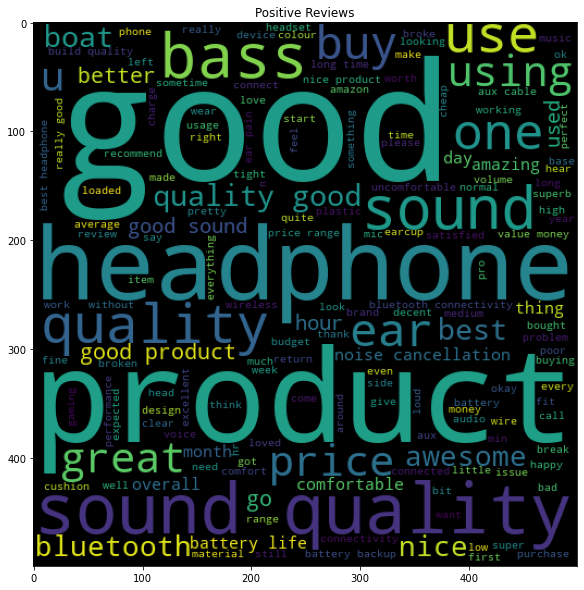

In [76]:
plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()

## Generate Negative Reviews Word Cloud

In [77]:
Negative=wc.generate(amazon[amazon['Polarity']<0]['reviews'].str.cat(sep=""))

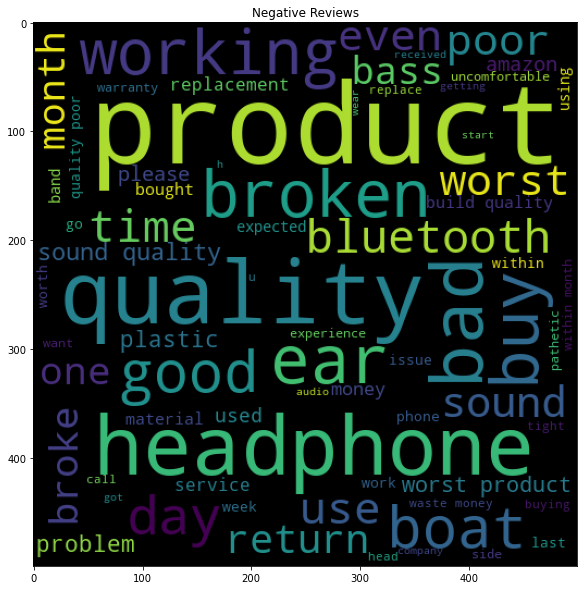

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

## Generate Neutral Reviews Word Cloud

In [79]:
Neutral = wc.generate(amazon[amazon['Polarity']==0]['reviews'].str.cat(sep=""))

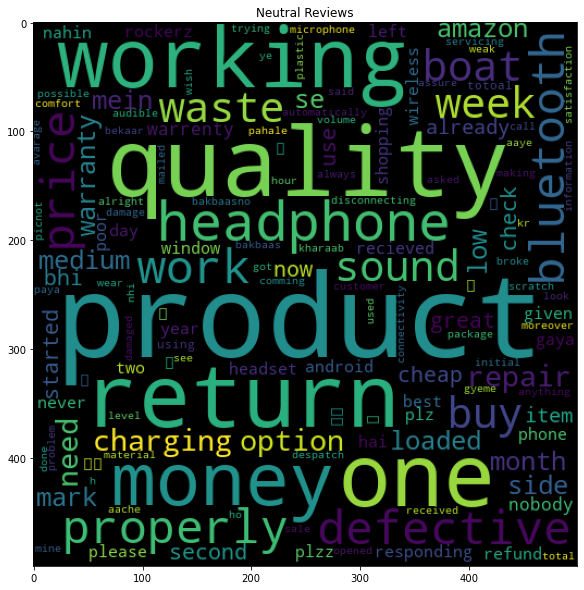

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

# Model Building 

In [81]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [82]:
x=vectorizer.fit_transform(amazon['reviews'])

In [83]:
#rows, reviews
x.shape

(880, 2849)

### LabelEncoder for classification Model

In [84]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [85]:
amazon['target']=encoder.fit_transform(amazon['Analysis'])
amazon

rating                                            reviews     sentiment  \
0      5.0           i happy buy product... nice product.....  7.000000e-01   
1      4.0  amazingly amazon it say 8 hr since i use watch...  2.512500e-01   
2      4.0  base king base really good. value range money....  8.000000e-02   
3      1.0  the head phone plastic band broken out. this p... -4.000000e-01   
4      2.0  cheap plastic, average product. sound distorte...  2.172143e-01   
5      5.0  value money sound crystal clearbass pretty goo...  3.250000e-01   
6      1.0  don't buy please... bass disgusting... range g... -1.500000e-01   
7      1.0  cheap quality i used 1 month headphone literal...  1.114583e-01   
8      4.0  after 2 month review marvelous performanceif w...  4.277778e-01   
9      1.0  broken within one month!!! i huge fan boat pur... -1.802083e-01   
10     4.0  product great recieved used product instead br...  1.602968e-01   
11     1.0  never go boat product didn't last month... it ... -7.142857e-02   
12     4.0                           value money product nice  6.000000e-01   
13     1.0  worst products. plz buy product.. using half h... -5.833333e-01   
14     5.0  perfect! free worry well i writing review 6 mo...  3.921667e-01   
15     5.0  very nice sound boat rocker 310 perhaps best s...  5.042857e-01   
16     5.0  amazing (bt) headphone the medium could loaded...  2.799242e-01   
17     1.0  useless headphones. poor basic headphones. hig... -3.791209e-02   
18     1.0  broke 3 month won’t return warranty period pro... -1.000000e-01   
19     1.0  not worth price product no voice cancellation ...  1.932692e-01   
20     1.0  not good my ear head stared paining. it's unco...  2.000000e-02   
21     4.0  pro con i would like start pro sound good batt...  3.500000e-01   
22     5.0  it's good after reading review people really l...  2.731250e-01   
23     5.0                        ok super super mind blowing  3.888889e-01   
24     2.0  bad product i wish i could give 0 star this pr... -1.593750e-01   
25     2.0  problem the headphone kinda good term audio qu...  5.000000e-01   
26     3.0  sound quality is great, build quality poor! so...  1.885417e-01   
27     2.0  poor ergonomics bought almost 4 month ago.work...  2.877976e-01   
28     4.0  bluetooth connectivity sound quality doubt goo...  1.197917e-01   
29     1.0  disappointed ,duplicate product don’t purchase...  2.500000e-02   
30     5.0  best price(999) i bought attend online class c...  5.187500e-01   
31     1.0  just okay. not great. this product okay great....  9.285714e-02   
32     5.0  battery life i using earphone 4 month now, sur...  2.250000e-01   
33     4.0  just above average product. for price 1100 blu...  1.722222e-01   
34     3.0  uncomfortable, pain ear i using headphone last...  8.428571e-02   
35     5.0  it work • good sound quality, vocal crystal cl...  2.434066e-01   
36     1.0  what stupid waste money i can't believe experi... -2.208333e-01   
37     5.0  noise cancellation?? my son can't hear me when...  3.979167e-01   
38     1.0  not worth wa working fine 1st week. started he... -4.032738e-02   
39     1.0  technical issue it's 2 month since i'm using p... -4.375000e-02   
40     4.0  average headphone good mic quality hey purchas...  2.575000e-01   
41     5.0  a decent product reasonable price! first all, ...  2.416667e-01   
42     2.0  it cheap version high price. the product come ...  1.075758e-02   
43     3.0  balanced sound longtime ache ear cause cufs ki...  2.270663e-01   
44     3.0  good product price range the medium could load...  2.916667e-01   
45     1.0  cheap plastic, average product. broken within ... -1.705128e-01   
46     1.0  bad mic , mic is not working bought on 29 may ... -7.000000e-01   
47     3.0  only bass good bass n sound quality good. but ...  1.500000e-01   
48     4.0  above average... this headphone good non-bass ...  2.571429e-01   
49     5.0  cristal clear sound, stylish perfect momen

In [86]:
y_svc=amazon['target'].values
y_svc

array([2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,

In [87]:
from sklearn.model_selection import train_test_split   

In [88]:
X_train,X_test,y_train,y_test=train_test_split(x,y_svc,test_size=0.1,random_state=40)

# SVC

In [89]:
from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [90]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[25,20,10,1,0.5],'C':[20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [20, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [25, 20, 10, 1, 0.5], 'kernel': ['rbf']}])

In [91]:
gsv.best_params_ , gsv.best_score_ 

({'C': 12, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8522626582278481)

In [92]:
clf = SVC(C= 20, gamma = 25)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 80.68181818181817


array([[ 0,  0, 14],
       [ 0,  0,  3],
       [ 0,  0, 71]], dtype=int64)

# KNN

In [93]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [95]:
print(grid_search.best_params_)

{'n_neighbors': 12}


In [96]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 82.06%


In [97]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [98]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [99]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [100]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 90.9090909090909


# Bagging Boosting 

In [101]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [103]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
y_predict = dcmodel.predict(X_test)

In [104]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  86.36363636363636


# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [106]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [107]:
rf.fit(X_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

rf.oob_score_ 

0.7916666666666666

In [108]:
rf.predict(X_test)

array([2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2])

In [109]:
preds = rf.predict(X_test)
pd.Series(preds).value_counts()

2    76
0     9
1     3
dtype: int64

In [110]:
preds

array([2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2])

In [111]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0  0  1   2
row_0          
0      7  1   6
1      1  1   1
2      1  1  69

In [112]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(preds==y_test)

0.875

In [113]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61         9
           1       0.33      0.33      0.33         3
           2       0.97      0.91      0.94        76

    accuracy                           0.88        88
   macro avg       0.60      0.67      0.63        88
weighted avg       0.90      0.88      0.88        88



# Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [115]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)


LogisticRegression()

In [116]:
y_pred=classifier.predict(X_train)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,

In [117]:
confusion_matrix = confusion_matrix(y_train,y_pred)
confusion_matrix

array([[117,   0,  41],
       [  4,   0,  28],
       [  0,   0, 602]], dtype=int64)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       158
           1       0.00      0.00      0.00        32
           2       0.90      1.00      0.95       602

    accuracy                           0.91       792
   macro avg       0.62      0.58      0.59       792
weighted avg       0.87      0.91      0.89       792



C:\Users\91960\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91960\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91960\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression giving the best result, we can use it for deployment

great


In [124]:
test_review = vectorizer.transform([input()])
prediction  = classifier.predict(test_review)
if  prediction == 2:
    print("positive sentiment")
elif prediction == 1:
    print("nutral sentiment")
else :
    print("negative sentiment")

base king base really good. value range money.i really liked it.only comfort good
positive sentiment


In [121]:
amazon['reviews'].iloc[2]

'base king base really good. value range money.i really liked it.only comfort good.'